In [1]:
import c2qa

import math

import matplotlib.pyplot
import numpy
import qiskit
import qiskit_aer

import c2qa
import c2qa.util
import c2qa.wigner

def calibration_circuit(dist, num_qumodes = 1, num_qubits_per_qumode = 4):
    qmr = c2qa.QumodeRegister(num_qumodes=num_qumodes, num_qubits_per_qumode=num_qubits_per_qumode)
    qr = qiskit.QuantumRegister(size=1)
    cr = qiskit.ClassicalRegister(size=1)
    circuit = c2qa.CVCircuit(qmr, qr, cr)

    circuit.initialize([1,0], qr[0])
    circuit.cv_initialize(0, qmr[0])

    circuit.h(qr[0])
    circuit.cv_c_d(dist, qmr[0], qr[0])
    circuit.cv_d(1j * dist, qmr[0])
    circuit.cv_c_d(-dist, qmr[0], qr[0])
    circuit.cv_d(-1j * dist, qmr[0])
    circuit.h(qr[0])
    circuit.measure(qr[0], cr[0])

    return circuit, qr[0], cr[0]


In [2]:
circuit, _, _  = calibration_circuit(numpy.sqrt(numpy.pi) / numpy.sqrt(2))
state, result, fock_counts = c2qa.util.simulate(circuit)
counts = result.get_counts(circuit)

print("Simulated statevector:")
print(state)
print("Simulated result counts:")
print(counts)

Simulated statevector:
Statevector([-9.99999967e-01+8.03973393e-17j,
              2.68488278e-17+1.41499239e-06j,
             -6.78787255e-06-1.14046637e-17j,
             -1.73590938e-17-8.74957992e-06j,
             -2.80769767e-05+3.76082641e-18j,
              9.82050032e-18-1.07346996e-04j,
              9.49687008e-05-9.01243086e-19j,
              6.62718600e-18-6.76692002e-05j,
              8.63810684e-05-6.53909457e-18j,
             -1.15806348e-17-7.18481148e-05j,
             -1.68382058e-05+5.47183302e-18j,
             -5.49554995e-18-8.43754939e-05j,
             -7.49838561e-05-2.11419431e-18j,
             -2.98663827e-18+2.08858618e-05j,
              3.15316355e-05-3.21194904e-18j,
              9.01581900e-18+1.09546757e-04j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00-0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00-0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
           

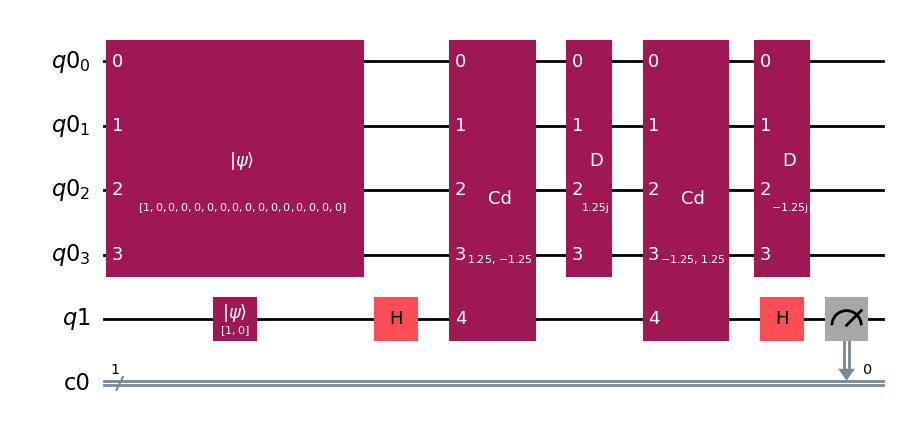

In [4]:
circuit.draw("mpl")